## Exploring The Calving Dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline   
import seaborn as sns
import random as random

sns.set_theme()
sns.set_context("notebook")
%load_ext autoreload
%autoreload 2

In [2]:
dtype_dict = {
    'SE_Number': 'str',
    'FarmName_Pseudo': 'str',
    'InseminationDate': 'str',
    'CalvingDate': 'str',
    'Breeder': 'Int64',
    'BreedName': 'str',
    'BirthDate': 'str',
    'YearSeason': 'str',
    'Mother': 'str',
    'Father': 'str',
    'CalvingSireBullID': 'str',
    'CalvingEase': 'str',
    'LactationNumber': 'Int64',
    'PrevInsemination': 'str',
    'NextInsemination': 'str',
    'NINS': 'Int64',
    'NextCalving': 'str',
    'FirstInsemination': 'str',
    'LastInsemination': 'str',
    'FLI': 'Int64',
    'NextFirstInsemination': 'str',
    'NextLastInsemination': 'str',
    'CFI': 'Int64',
    'CLI': 'Int64',
    'GL': 'Int64',
    'CI': 'Int64',
    'PregnancyCheck': 'Int64',
    'MeanTemperature': 'float',
    'MeanRelativeHumidity': 'float',
    'MeanTHI_adj': 'float',
    'HW': 'Int64',
    'Cum_HW': 'Int64',
    'MaxTemp15Threshold': 'Int64'
}

# Load the data using the dtype_dict
data = pd.read_csv('../Data/MergedData/TheFertilityData.csv', dtype=dtype_dict)

# Convert the date columns to datetime
date_columns = [
    'InseminationDate',
    'CalvingDate',
    'BirthDate',
    'PrevInsemination',
    'NextInsemination',
    'NextCalving',
    'FirstInsemination',
    'LastInsemination',
    'NextFirstInsemination',
    'NextLastInsemination'
]

for column in date_columns:
    data[column] = pd.to_datetime(data[column], errors='coerce')

data.head()

SE_Number FarmName_Pseudo InseminationDate CalvingDate  Breeder  \
0  SE-064c0cec-1189        a624fb9a       2022-07-06         NaT     2746   
1  SE-064c0cec-1189        a624fb9a       2022-08-16         NaT     9220   
2  SE-30dc5787-1389        a624fb9a       2022-05-27  2023-05-15     2746   
3  SE-30dc5787-1389        a624fb9a       2022-06-18  2023-05-15     2746   
4  SE-30dc5787-1389        a624fb9a       2022-07-31  2023-05-15     2746   

  YearSeason BreedName  BirthDate Mother Father  ...   CLI    GL    CI  \
0     2022-3    02 SLB 2013-07-12    NaN    NaN  ...  <NA>  <NA>  <NA>   
1     2022-3    02 SLB 2013-07-12    NaN    NaN  ...  <NA>  <NA>  <NA>   
2     2022-2    01 SRB 2015-01-27    NaN    NaN  ...  <NA>   288  <NA>   
3     2022-3    01 SRB 2015-01-27    NaN    NaN  ...  <NA>   288     0   
4     2022-3    01 SRB 2015-01-27    NaN    NaN  ...  <NA>   288     0   

  PregnancyCheck MeanTemperature  MeanRelativeHumidity MeanTHI_adj HW cum_HW  \
0              0       16.520833              0.686333   63.101586  0      0   
1              1       22.383333              0.773708   70.607246  0      0   
2              0        9.804167              0.898500   52.378583  0      0   
3              0       15.879167              0.753667   59.771498  0      0   
4              1       16.958333              0.724042   63.367211  0      0   

   MaxTemp15Threshold  
0                   1  
1                   1  
2                   0  
3                   1  
4                   1  

[5 rows x 33 columns]

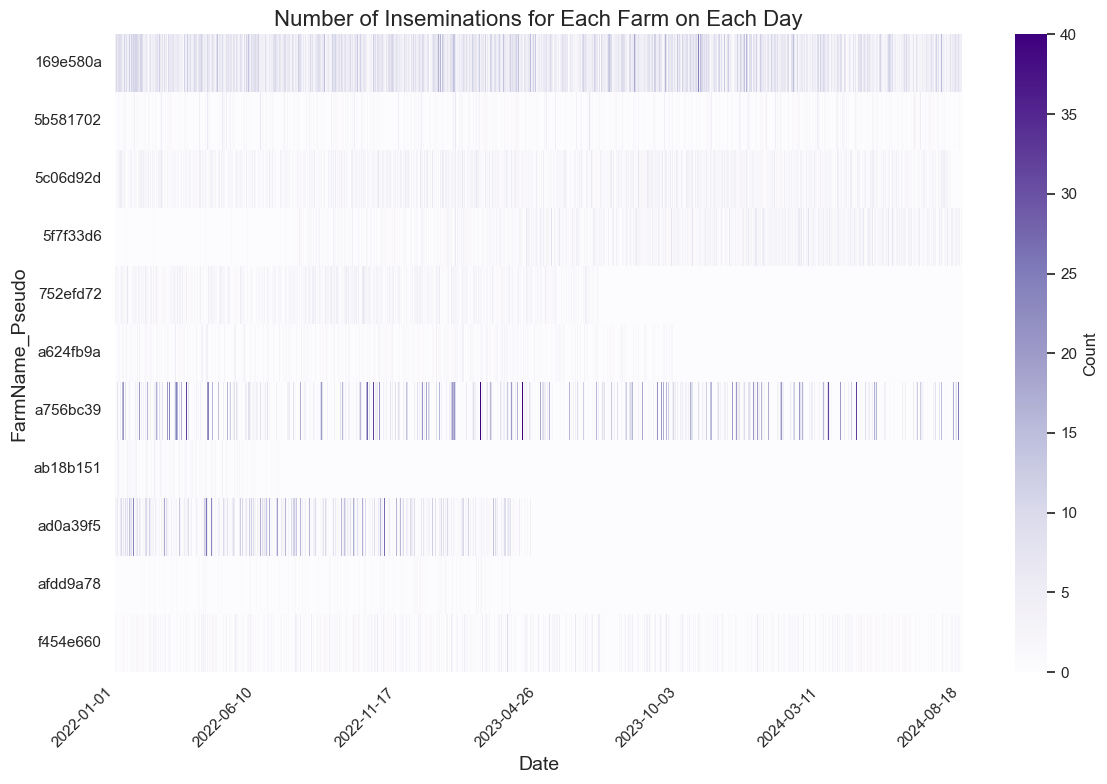

In [3]:
# Group the data by 'FarmName_Pseudo' and 'InseminationDate', and get the count
count_data = data.groupby(['FarmName_Pseudo', 'InseminationDate']).size().reset_index(name='Count')

# Convert 'InseminationDate' to datetime
count_data['InseminationDate'] = pd.to_datetime(count_data['InseminationDate'])

# Sort the data by date to ensure the labels match the ticks
count_data.sort_values('InseminationDate', inplace=True)

# Pivot to have 'InseminationDate' as columns and 'FarmName_Pseudo' as index
pivot_data = count_data.pivot(index='FarmName_Pseudo', columns='InseminationDate', values='Count').fillna(0)

# Plot data
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_data, cmap='Purples', cbar_kws={'label': 'Count'})

num_days = len(pivot_data.columns)
days_between_ticks = num_days // 6  # Adjust this as needed 

ax.set_xticks(range(0, num_days, days_between_ticks))
ax.set_xticklabels([date.strftime('%Y-%m-%d') for date in pivot_data.columns[::days_between_ticks]], rotation=45, ha='right')
plt.xlabel('Date', fontsize=14)
plt.ylabel('FarmName_Pseudo', fontsize=14)
plt.title('Number of Inseminations for Each Farm on Each Day', fontsize=16)

plt.tight_layout()
plt.show()

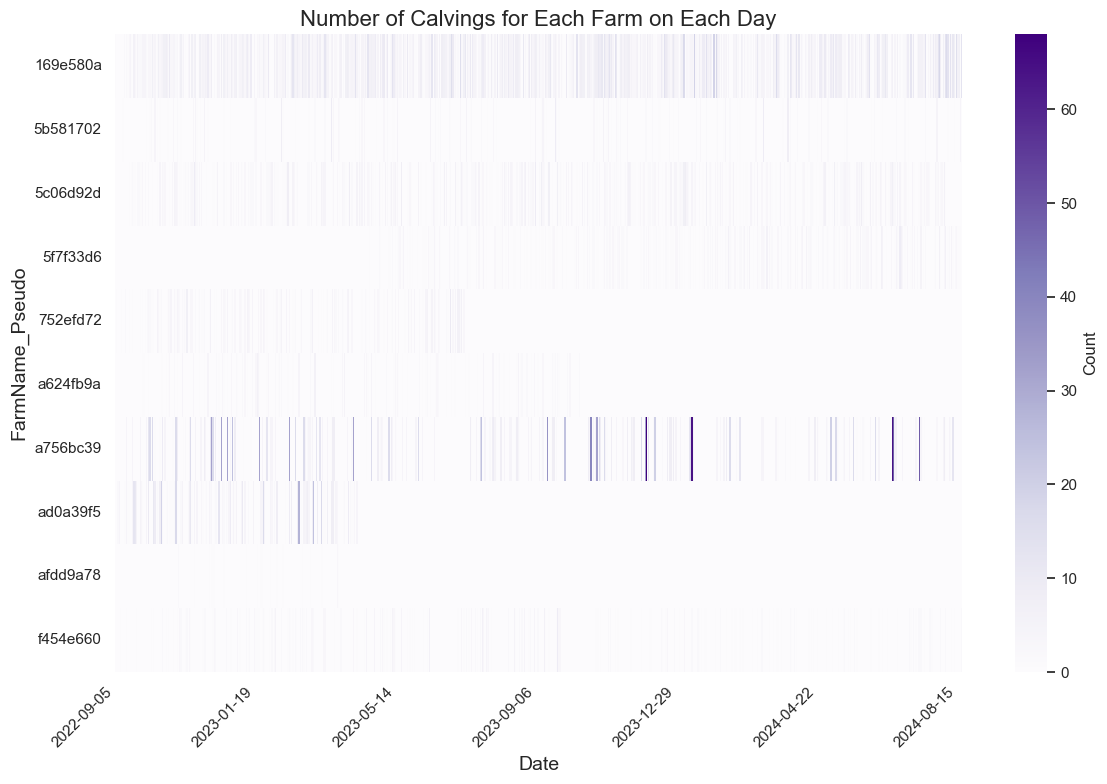

In [4]:
# Group the data by 'FarmName_Pseudo' and 'CalvingDate', and get the count
count_data = data.groupby(['FarmName_Pseudo', 'CalvingDate']).size().reset_index(name='Count')

# Convert 'CalvingDate' to datetime
count_data['CalvingDate'] = pd.to_datetime(count_data['CalvingDate'])

# Sort the data by date to ensure the labels match the ticks
count_data.sort_values('CalvingDate', inplace=True)

# Pivot to have 'CalvingDate' as columns and 'FarmName_Pseudo' as index
pivot_data = count_data.pivot(index='FarmName_Pseudo', columns='CalvingDate', values='Count').fillna(0)

# Plot data
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_data, cmap='Purples', cbar_kws={'label': 'Count'})

num_days = len(pivot_data.columns)
days_between_ticks = max(num_days // 6, 1)  # Adjust this as needed 

ax.set_xticks(range(0, num_days, days_between_ticks))
ax.set_xticklabels([date.strftime('%Y-%m-%d') for date in pivot_data.columns[::days_between_ticks]], rotation=45, ha='right')
plt.xlabel('Date', fontsize=14)
plt.ylabel('FarmName_Pseudo', fontsize=14)
plt.title('Number of Calvings for Each Farm on Each Day', fontsize=16)

plt.tight_layout()
plt.show()

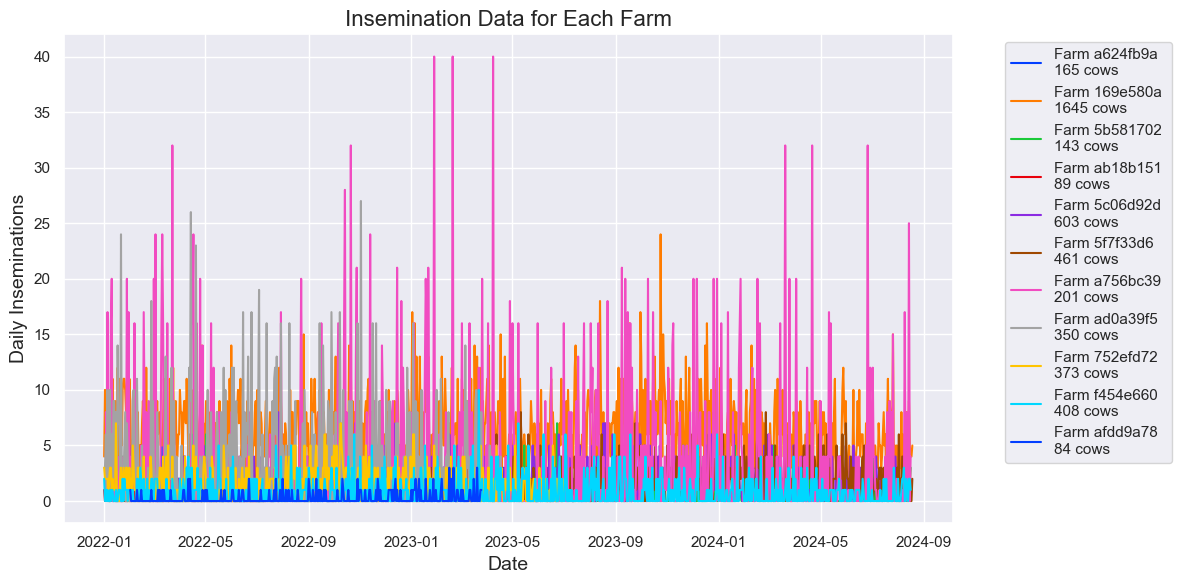

In [5]:
# List of farms
list_of_farms = list(data["FarmName_Pseudo"].unique())
fig, ax = plt.subplots(figsize=(12, 6))

# Dictionary to store farm color mapping
farm_color_mapping = {}

# Loop through each farm and plot
for i, farm in enumerate(list_of_farms):
    selected_farm = data[data['FarmName_Pseudo'] == farm]
    number_of_cows = len(selected_farm['SE_Number'].unique())
    daily_inseminations = selected_farm.groupby('InseminationDate').size()
    color = sns.color_palette('bright', n_colors=len(list_of_farms))[i]
    farm_color_mapping[farm] = color
    all_dates = pd.date_range(start=daily_inseminations.index.min(), end=daily_inseminations.index.max(), freq='D')
    missing_dates = all_dates.difference(daily_inseminations.index)
    daily_inseminations = daily_inseminations.reindex(all_dates, fill_value=0)
    
    ax.plot(daily_inseminations.index, daily_inseminations.values, label=f'Farm {farm} \n{number_of_cows} cows', color=color)

ax.set_title('Insemination Data for Each Farm', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Daily Inseminations', fontsize=14)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

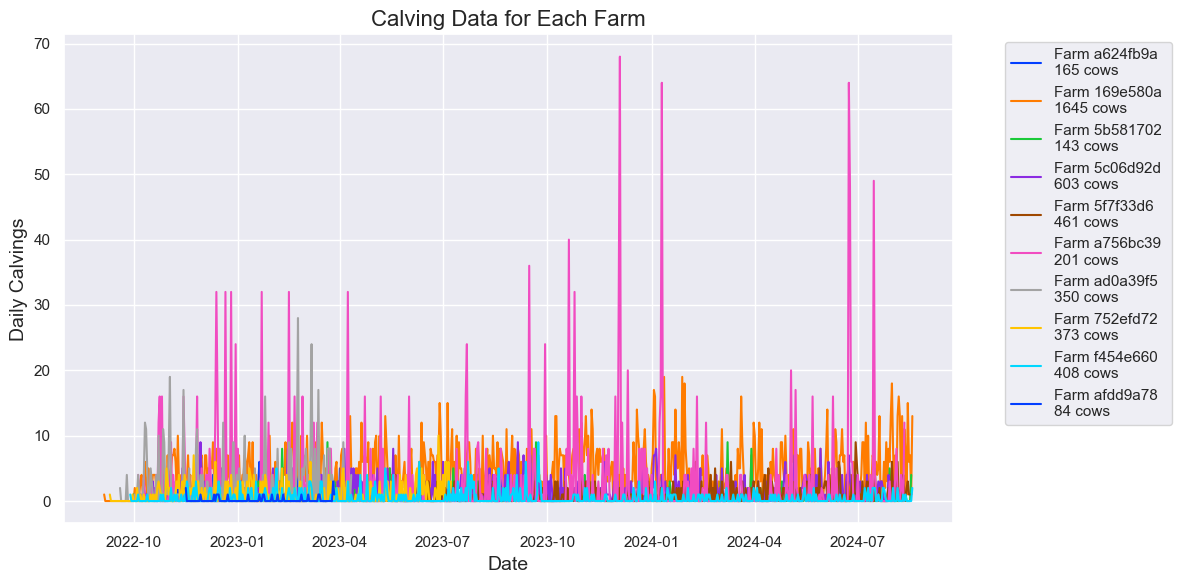

In [6]:
# List of farms
list_of_farms = list(data["FarmName_Pseudo"].unique())
fig, ax = plt.subplots(figsize=(12, 6))

# Dictionary to store farm color mapping
farm_color_mapping = {}

# Loop through each farm and plot
for i, farm in enumerate(list_of_farms):
    selected_farm = data[data['FarmName_Pseudo'] == farm]
    number_of_cows = len(selected_farm['SE_Number'].unique())
    daily_calvings = selected_farm.groupby('CalvingDate').size()
    
    # Check if daily_calvings has valid dates
    if not daily_calvings.empty and pd.notna(daily_calvings.index.min()) and pd.notna(daily_calvings.index.max()):
        color = sns.color_palette('bright', n_colors=len(list_of_farms))[i]
        farm_color_mapping[farm] = color
        all_dates = pd.date_range(start=daily_calvings.index.min(), end=daily_calvings.index.max(), freq='D')
        daily_calvings = daily_calvings.reindex(all_dates, fill_value=0)
        
        ax.plot(daily_calvings.index, daily_calvings.values, label=f'Farm {farm} \n{number_of_cows} cows', color=color)
    
ax.set_title('Calving Data for Each Farm', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Daily Calvings', fontsize=14)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

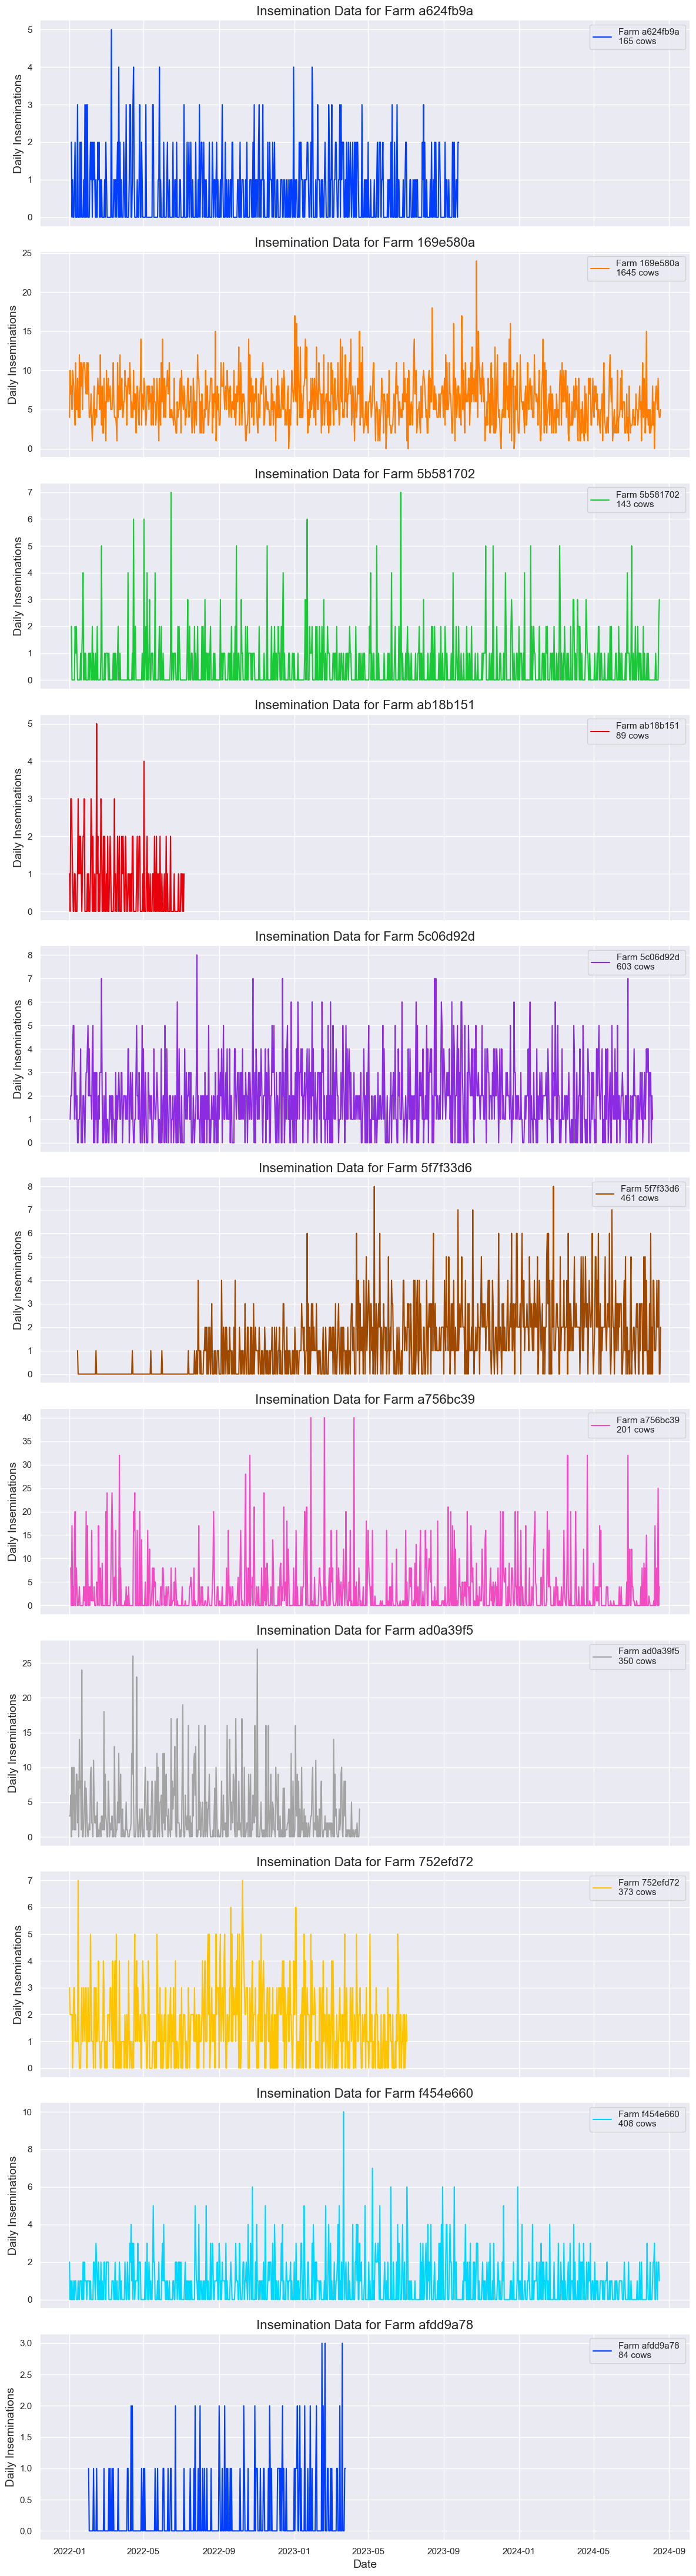

In [7]:
# List of farms
list_of_farms = list(data["FarmName_Pseudo"].unique())
fig, axs = plt.subplots(len(list_of_farms), 1, figsize=(12, len(list_of_farms) * 4), sharex=True)

# Dictionary to store farm color mapping
farm_color_mapping = {}

# Loop through each farm and plot in its subplot
for i, farm in enumerate(list_of_farms):
    ax = axs[i]
    
    selected_farm = data[data['FarmName_Pseudo'] == farm]
    number_of_cows = len(selected_farm['SE_Number'].unique())
    daily_inseminations = selected_farm.groupby('InseminationDate').size()
    
    # Check if daily_inseminations has valid dates
    if not daily_inseminations.empty and pd.notna(daily_inseminations.index.min()) and pd.notna(daily_inseminations.index.max()):
        color = sns.color_palette('bright', n_colors=len(list_of_farms))[i]
        farm_color_mapping[farm] = color
        all_dates = pd.date_range(start=daily_inseminations.index.min(), end=daily_inseminations.index.max(), freq='D')
        daily_inseminations = daily_inseminations.reindex(all_dates, fill_value=0)
        
        ax.plot(daily_inseminations.index, daily_inseminations.values, label=f'Farm {farm} \n{number_of_cows} cows', color=color)
        ax.set_title(f'Insemination Data for Farm {farm}', fontsize=16)
        ax.set_ylabel('Daily Inseminations', fontsize=14)
        ax.legend(loc='upper right')
        ax.grid(True)
    else:
        ax.set_title(f'Insemination Data for Farm {farm} (No valid data)', fontsize=16)
        ax.set_ylabel('Daily Inseminations', fontsize=14)
        ax.grid(True)

axs[-1].set_xlabel('Date', fontsize=14)
plt.tight_layout()
plt.show()

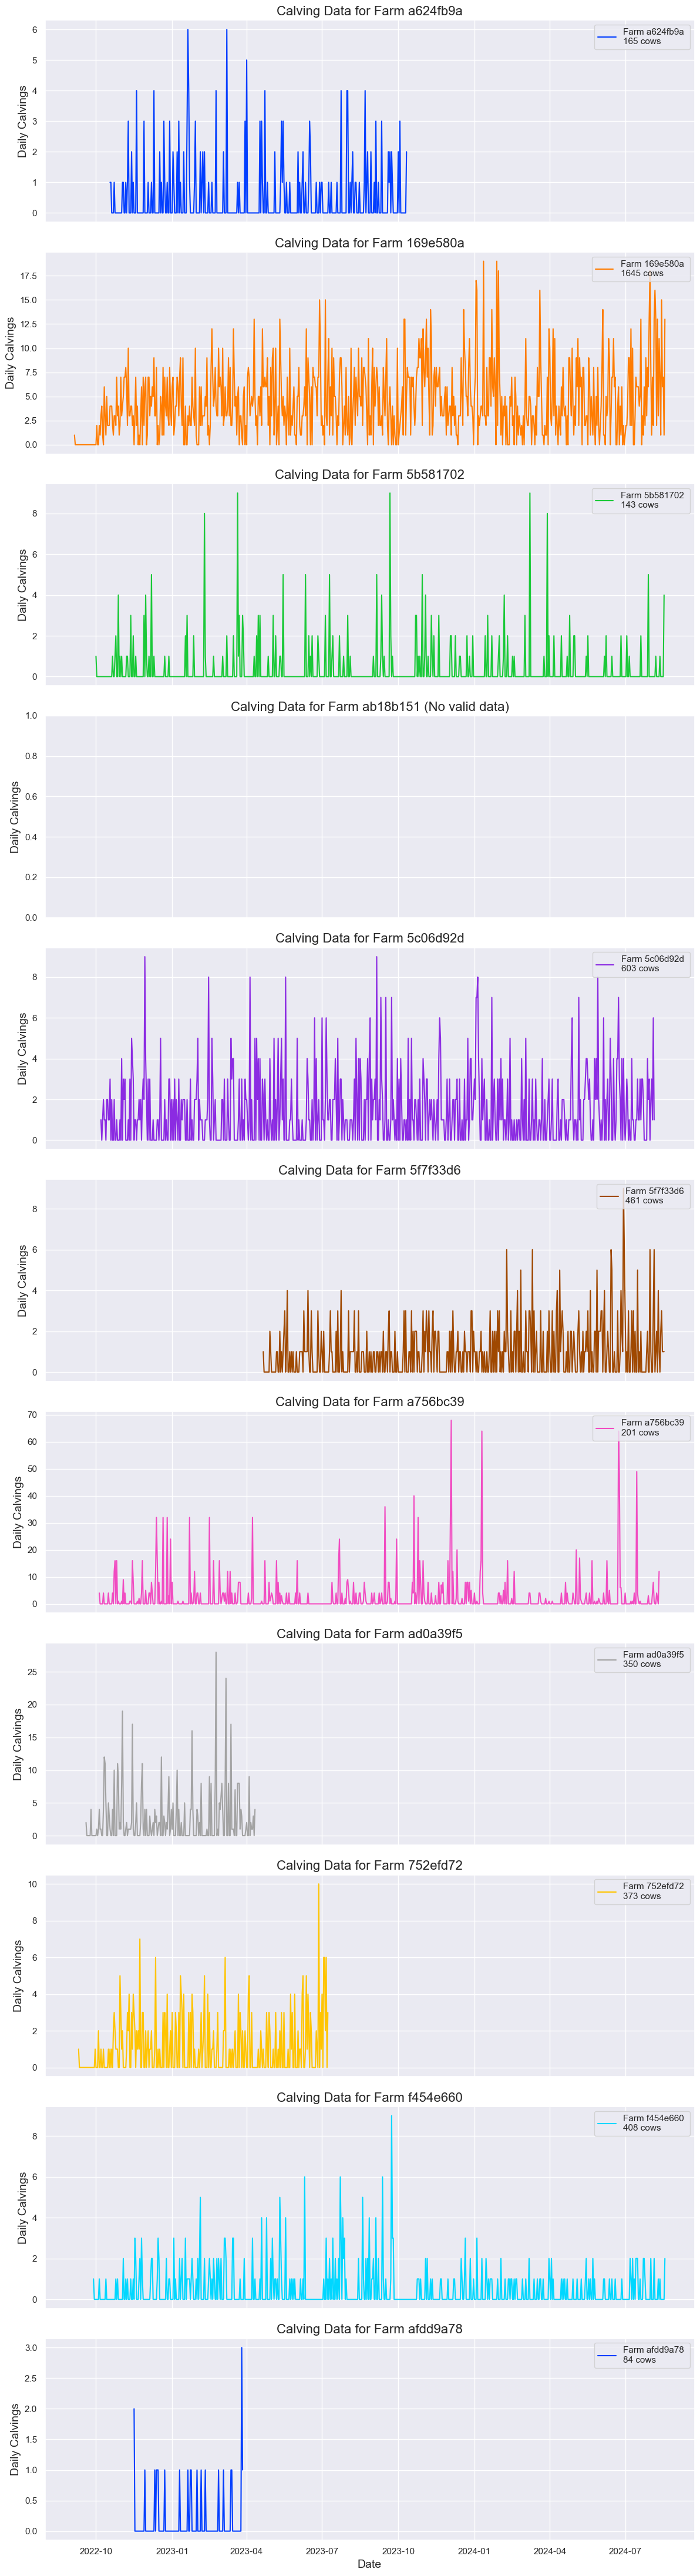

In [8]:
# List of farms
list_of_farms = list(data["FarmName_Pseudo"].unique())
fig, axs = plt.subplots(len(list_of_farms), 1, figsize=(12, len(list_of_farms) * 4), sharex=True)

# Dictionary to store farm color mapping
farm_color_mapping = {}

# Loop through each farm and plot in its subplot
for i, farm in enumerate(list_of_farms):
    ax = axs[i]
    
    selected_farm = data[data['FarmName_Pseudo'] == farm]
    number_of_cows = len(selected_farm['SE_Number'].unique())
    daily_calvings = selected_farm.groupby('CalvingDate').size()
    
    # Check if daily_calvings has valid dates
    if not daily_calvings.empty and pd.notna(daily_calvings.index.min()) and pd.notna(daily_calvings.index.max()):
        color = sns.color_palette('bright', n_colors=len(list_of_farms))[i]
        farm_color_mapping[farm] = color
        all_dates = pd.date_range(start=daily_calvings.index.min(), end=daily_calvings.index.max(), freq='D')
        daily_calvings = daily_calvings.reindex(all_dates, fill_value=0)
        
        ax.plot(daily_calvings.index, daily_calvings.values, label=f'Farm {farm} \n{number_of_cows} cows', color=color)
        ax.set_title(f'Calving Data for Farm {farm}', fontsize=16)
        ax.set_ylabel('Daily Calvings', fontsize=14)
        ax.legend(loc='upper right')
        ax.grid(True)
    else:
        ax.set_title(f'Calving Data for Farm {farm} (No valid data)', fontsize=16)
        ax.set_ylabel('Daily Calvings', fontsize=14)
        ax.grid(True)

axs[-1].set_xlabel('Date', fontsize=14)
plt.tight_layout()
plt.show()

The hardest thing now is to assume what exactly we need, and which variables can be NaN's and so on.

In [9]:
# Display the number of rows before filtering
print(f"Original number of rows: {data.shape[0]}")

# Check for missing LactationNumber per farm
missing_lactation_per_farm = data[data['LactationNumber'].isna()].groupby('FarmName_Pseudo').size()

# Display the number of missing LactationNumber entries for each farm
print("\nNumber of missing LactationNumber entries for each farm:")
print(missing_lactation_per_farm)

# Get the total number of rows for each farm
total_rows_per_farm = data.groupby('FarmName_Pseudo').size()

# Calculate the percentage of missing LactationNumber entries
percentage_missing_lactation = (missing_lactation_per_farm / total_rows_per_farm) * 100

# Display the percentage of missing LactationNumber entries for each farm
print("\nPercentage of missing LactationNumber entries for each farm:")
print(percentage_missing_lactation)

Original number of rows: 16523

Number of missing LactationNumber entries for each farm:
FarmName_Pseudo
5f7f33d6    111
ad0a39f5      4
afdd9a78     39
f454e660     52
dtype: int64

Percentage of missing LactationNumber entries for each farm:
FarmName_Pseudo
169e580a          NaN
5b581702          NaN
5c06d92d          NaN
5f7f33d6     8.887110
752efd72          NaN
a624fb9a          NaN
a756bc39          NaN
ab18b151          NaN
ad0a39f5     0.252366
afdd9a78    33.050847
f454e660     6.220096
dtype: float64


In [10]:
# Sort data by SE_Number and InseminationDate to process in chronological order
data = data.sort_values(by=['SE_Number', 'InseminationDate'])

# Display the number of rows before and after filtering
print(f"Original number of rows: {data.shape[0]}")
print(f"Number of rows after filtering for rows that are missing LactationNumber: {data.dropna(subset=['LactationNumber']).shape[0]}")

# Print the final data
data

Original number of rows: 16523
Number of rows after filtering for rows that are missing LactationNumber: 16317


SE_Number FarmName_Pseudo InseminationDate CalvingDate  \
0        SE-064c0cec-1189        a624fb9a       2022-07-06         NaT   
1        SE-064c0cec-1189        a624fb9a       2022-08-16         NaT   
427      SE-169e580a-1624        169e580a       2022-03-06  2022-12-25   
428      SE-169e580a-1624        169e580a       2022-03-30  2022-12-25   
429      SE-169e580a-1624        169e580a       2023-03-08         NaT   
...                   ...             ...              ...         ...   
16400   SE-f454e660-862-8        f454e660       2023-09-11         NaT   
16401  SE-fcdf259d-0044-0        f454e660       2022-08-26  2023-09-04   
16402  SE-fcdf259d-0044-0        f454e660       2022-09-20  2023-09-04   
16403  SE-fcdf259d-0044-0        f454e660       2022-11-07  2023-09-04   
16404  SE-fcdf259d-0044-0        f454e660       2022-12-01  2023-09-04   

       Breeder YearSeason   BreedName  BirthDate            Mother  \
0         2746     2022-3      02 SLB 2013-07-12               NaN   
1         9220     2022-3      02 SLB 2013-07-12               NaN   
427       4325     2022-2      02 SLB 2024-06-03  SE-169e580a-5844   
428       8531     2022-2      02 SLB 2024-06-03  SE-169e580a-5844   
429       1412     2023-2      02 SLB 2024-06-03  SE-169e580a-5844   
...        ...        ...         ...        ...               ...   
16400     9068     2023-4      04 SJB 2022-05-29   SE-f454e660-612   
16401     1423     2022-3  41 Fjällko 2012-01-22               NaN   
16402     1423     2022-4  41 Fjällko 2012-01-22               NaN   
16403     1423     2022-4  41 Fjällko 2012-01-22               NaN   
16404     1423     2022-1  41 Fjällko 2012-01-22               NaN   

               Father  ...   CLI    GL    CI PregnancyCheck MeanTemperature  \
0                 NaN  ...  <NA>  <NA>  <NA>              0       16.520833   
1                 NaN  ...  <NA>  <NA>  <NA>              1       22.383333   
427    9-8654 Harmony  ...  <NA>   270  <NA>              0        2.116667   
428    9-8654 Harmony  ...   202   270     0              1       -0.266667   
429    9-8654 Harmony  ...  <NA>  <NA>  <NA>              0       -4.495833   
...               ...  ...   ...   ...   ...            ...             ...   
16400     Cozy 9-9807  ...  <NA>  <NA>  <NA>              1       17.129167   
16401             NaN  ...  <NA>   277  <NA>              0       20.258333   
16402             NaN  ...  <NA>   277     0              0       10.812500   
16403             NaN  ...  <NA>   277     0              0       10.208333   
16404             NaN  ...  <NA>   277     0              1        2.795833   

       MeanRelativeHumidity MeanTHI_adj HW cum_HW  MaxTemp15Threshold  
0                  0.686333   63.101586  0      0                   1  
1                  0.773708   70.607246  0      0                   1  
427                0.831750   36.958227  0      0                   0  
428                0.603042   36.976989  0      0                   0  
429                0.708333   28.900386  0      0                   0  
...                     ...         ... ..    ...                 ...  
16400              0.933958   65.140095  0      0                   1  
16401              0.840667   67.309635  1      2                   1  
16402              0.836917   48.699021  0      0                   0  
16403              0.891750   42.893592  0      0                   0  
16404              0.961542   38.285992  0      0                   0  

[16523 rows x 33 columns]

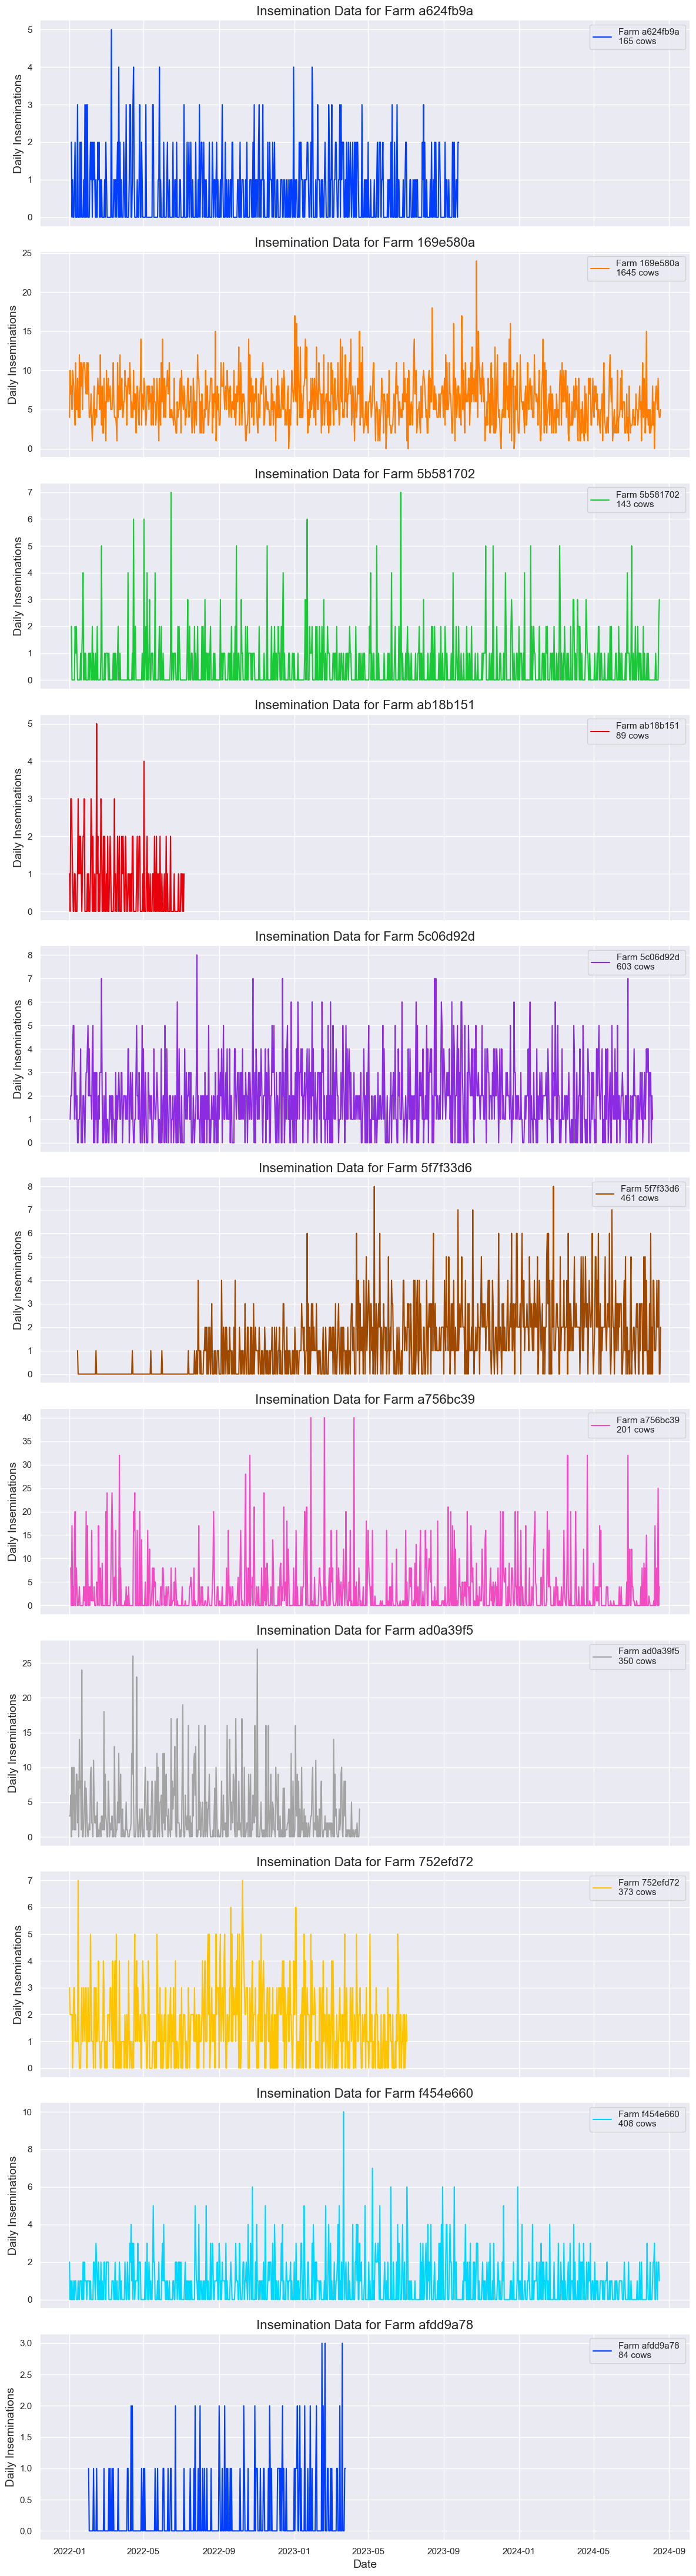

In [11]:
# List of farms
list_of_farms = list(data["FarmName_Pseudo"].unique())
fig, axs = plt.subplots(len(list_of_farms), 1, figsize=(12, len(list_of_farms) * 4), sharex=True)

# Dictionary to store farm color mapping
farm_color_mapping = {}

# Loop through each farm and plot in its subplot
for i, farm in enumerate(list_of_farms):
    ax = axs[i]
    
    selected_farm = data[data['FarmName_Pseudo'] == farm]
    number_of_cows = len(selected_farm['SE_Number'].unique())
    daily_inseminations = selected_farm.groupby('InseminationDate').size()
    
    # Check if daily_inseminations has valid dates
    if not daily_inseminations.empty and pd.notna(daily_inseminations.index.min()) and pd.notna(daily_inseminations.index.max()):
        color = sns.color_palette('bright', n_colors=len(list_of_farms))[i]
        farm_color_mapping[farm] = color
        all_dates = pd.date_range(start=daily_inseminations.index.min(), end=daily_inseminations.index.max(), freq='D')
        daily_inseminations = daily_inseminations.reindex(all_dates, fill_value=0)
        
        ax.plot(daily_inseminations.index, daily_inseminations.values, label=f'Farm {farm} \n{number_of_cows} cows', color=color)
        ax.set_title(f'Insemination Data for Farm {farm}', fontsize=16)
        ax.set_ylabel('Daily Inseminations', fontsize=14)
        ax.legend(loc='upper right')
        ax.grid(True)
    else:
        ax.set_title(f'Insemination Data for Farm {farm} (No valid data)', fontsize=16)
        ax.set_ylabel('Daily Inseminations', fontsize=14)
        ax.grid(True)

axs[-1].set_xlabel('Date', fontsize=14)
plt.tight_layout()
plt.show()

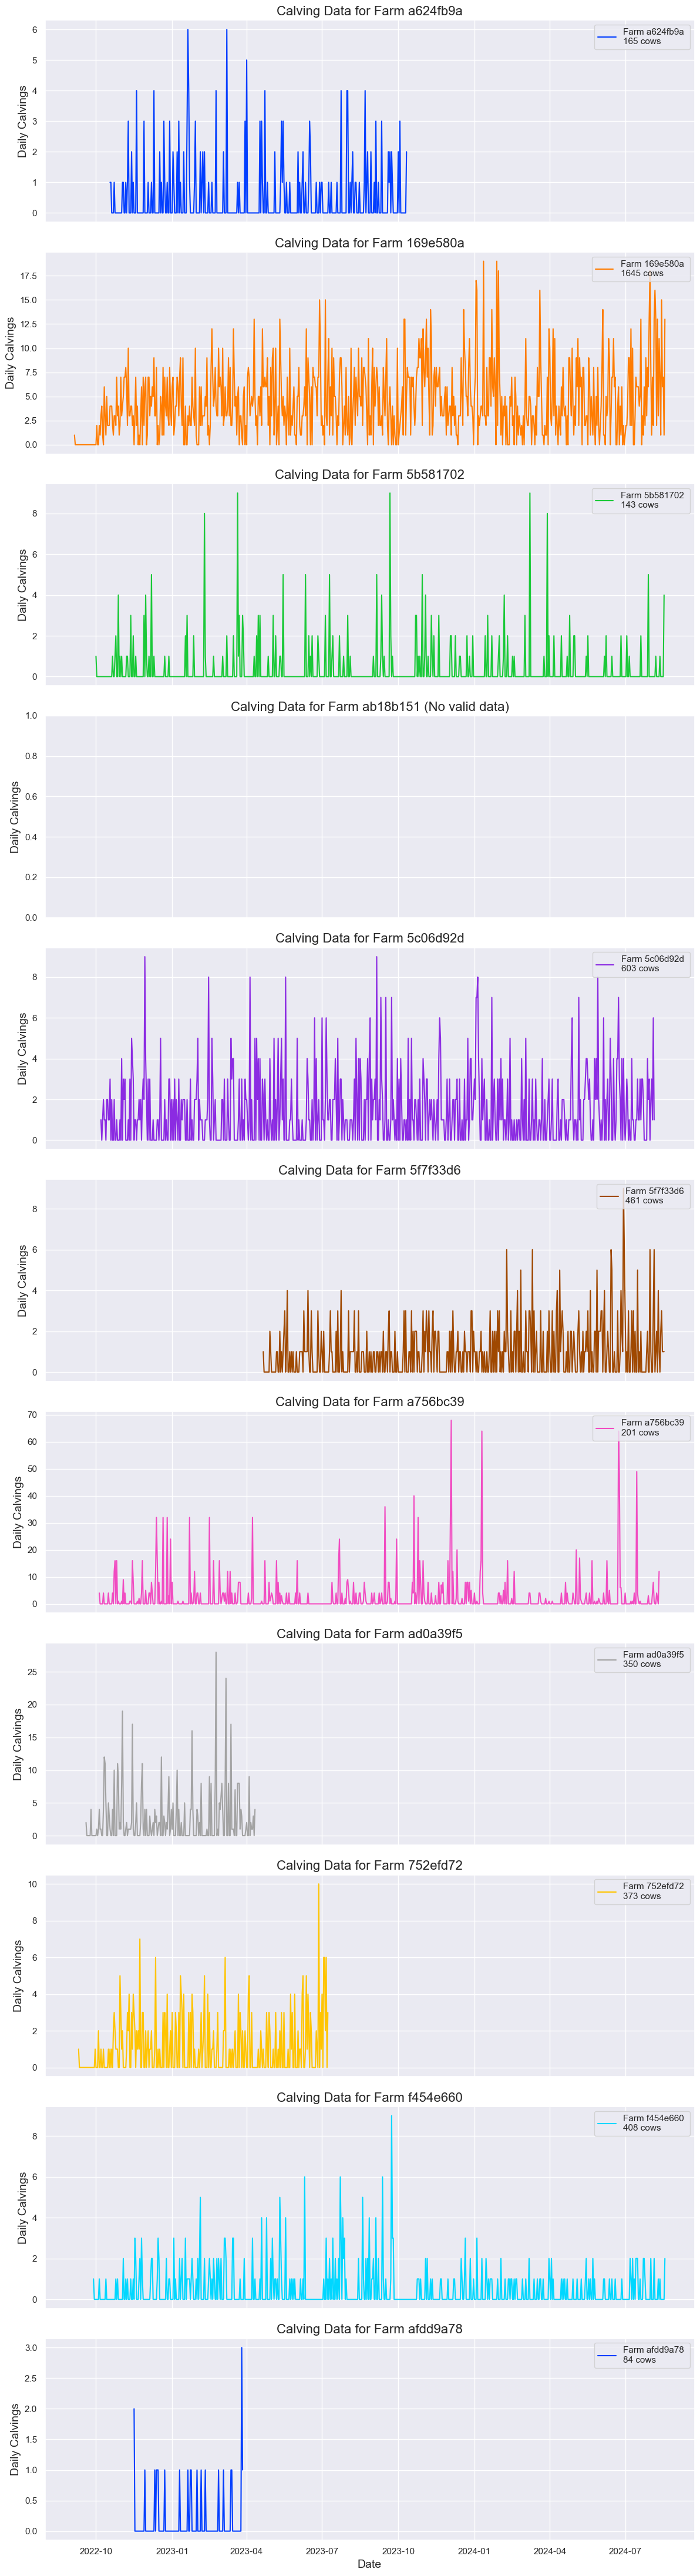

In [12]:
# List of farms
list_of_farms = list(data["FarmName_Pseudo"].unique())
fig, axs = plt.subplots(len(list_of_farms), 1, figsize=(12, len(list_of_farms) * 4), sharex=True)

# Dictionary to store farm color mapping
farm_color_mapping = {}

# Loop through each farm and plot in its subplot
for i, farm in enumerate(list_of_farms):
    ax = axs[i]
    
    selected_farm = data[data['FarmName_Pseudo'] == farm]
    number_of_cows = len(selected_farm['SE_Number'].unique())
    daily_calvings = selected_farm.groupby('CalvingDate').size()
    
    # Check if daily_calvings has valid dates
    if not daily_calvings.empty and pd.notna(daily_calvings.index.min()) and pd.notna(daily_calvings.index.max()):
        color = sns.color_palette('bright', n_colors=len(list_of_farms))[i]
        farm_color_mapping[farm] = color
        all_dates = pd.date_range(start=daily_calvings.index.min(), end=daily_calvings.index.max(), freq='D')
        daily_calvings = daily_calvings.reindex(all_dates, fill_value=0)
        
        ax.plot(daily_calvings.index, daily_calvings.values, label=f'Farm {farm} \n{number_of_cows} cows', color=color)
        ax.set_title(f'Calving Data for Farm {farm}', fontsize=16)
        ax.set_ylabel('Daily Calvings', fontsize=14)
        ax.legend(loc='upper right')
        ax.grid(True)
    else:
        ax.set_title(f'Calving Data for Farm {farm} (No valid data)', fontsize=16)
        ax.set_ylabel('Daily Calvings', fontsize=14)
        ax.grid(True)

axs[-1].set_xlabel('Date', fontsize=14)
plt.tight_layout()
plt.show()

## Which Farms To Choose 

Some columns are to important to not have, thus, when we now have filtered all the data here, after the exploration, we can see that these following farms have sufficient data: 

**a624fb9a**

**169e580a**

**5b581702**

**a756bc39**

**5c06d92d**

**f454e660**

In [13]:
selected_farms = ['a624fb9a', '169e580a', '5b581702', 'a756bc39', '5c06d92d', 'f454e660']
data = data[data['FarmName_Pseudo'].isin(selected_farms)]

# Save the cleaned data to a new CSV file called 'CleanedFertilityData.csv' in same folder
data.to_csv('../Data/MergedData/CleanedFertilityData.csv', index=False)

### Variables Explanation for `CleanedFertilityData.csv`

1. **SE_Number**:
   - Description: A unique identifier for each cow.
   - Datatype: `str`
   - Example: `SE-12345`

2. **FarmName_Pseudo**:
   - Description: A pseudonym for the farm where the data was collected.
   - Datatype: `str`
   - Example: `Farm_XYZ`

3. **InseminationDate**:
   - Description: The date when the insemination was performed.
   - Datatype: `str` (should be converted to `datetime` for operations)
   - Format: `YYYY-MM-DD`
   - Example: `2022-05-01`

4. **CalvingDate**:
   - Description: The date when the cow calved.
   - Datatype: `str` (should be converted to `datetime` for operations)
   - Format: `YYYY-MM-DD`
   - Example: `2023-02-15`

5. **Breeder**:
   - Description: An identifier for the breeder involved in the process.
   - Datatype: `Int64`
   - Example: `123456`

6. **BreedName**:
   - Description: The breed of the cow.
   - Datatype: `str`
   - Example: `Holstein`

7. **BirthDate**:
   - Description: The birth date of the cow.
   - Datatype: `str` (should be converted to `datetime` for operations)
   - Format: `YYYY-MM-DD`
   - Example: `2020-03-01`

8. **YearSeason**:
   - Description: A categorical variable representing the season based on the month and year.
   - Datatype: `str`
   - Example: `2022-1`
   - YearSeason parameters:
     - 1: Dec-Feb
     - 2: Mar-May
     - 3: Jun-Aug
     - 4: Sep-Nov

9. **Mother**:
   - Description: The identifier for the mother of the cow.
   - Datatype: `str`
   - Example: `Mother_001`

10. **Father**:
    - Description: The identifier for the father of the cow.
    - Datatype: `str`
    - Example: `Father_001`

11. **CalvingSireBullID**:
    - Description: The identifier for the bull used in the calving.
    - Datatype: `str`
    - Example: `Bull_001`

12. **CalvingEase**:
    - Description: A categorical variable indicating the ease of calving.
    - Datatype: `str`
    - Example: `11` (Easy, without assistance)

13. **LactationNumber**:
    - Description: The number indicating the lactation cycle of the cow.
    - Datatype: `Int64`
    - Example: `2`

14. **PrevInsemination**:
    - Description: The date of the previous insemination.
    - Datatype: `str` (should be converted to `datetime` for operations)
    - Format: `YYYY-MM-DD`
    - Example: `2021-09-15`

15. **NextInsemination**:
    - Description: The date of the next insemination after the current record.
    - Datatype: `str` (should be converted to `datetime` for operations)
    - Format: `YYYY-MM-DD`
    - Example: `2023-08-01`

16. **NINS**:
    - Description: Number of unique inseminations within the lactation cycle.
    - Datatype: `Int64`
    - Example: `3`

17. **NextCalving**:
    - Description: The expected date for the next calving.
    - Datatype: `str` (should be converted to `datetime` for operations)
    - Format: `YYYY-MM-DD`
    - Example: `2024-02-10`

18. **FirstInsemination**:
    - Description: The date of the first insemination in the current lactation.
    - Datatype: `str` (should be converted to `datetime` for operations)
    - Format: `YYYY-MM-DD`
    - Example: `2022-01-01`

19. **LastInsemination**:
    - Description: The date of the last insemination in the current lactation.
    - Datatype: `str` (should be converted to `datetime` for operations)
    - Format: `YYYY-MM-DD`
    - Example: `2022-06-01`

20. **FLI**:
    - Description: The number of days between the first and last insemination in the lactation cycle.
    - Datatype: `Int64`
    - Example: `150`

21. **NextFirstInsemination**:
    - Description: The date of the first insemination in the next lactation cycle.
    - Datatype: `str` (should be converted to `datetime` for operations)
    - Format: `YYYY-MM-DD`
    - Example: `2023-05-01`

22. **NextLastInsemination**:
    - Description: The date of the last insemination in the next lactation cycle.
    - Datatype: `str` (should be converted to `datetime` for operations)
    - Format: `YYYY-MM-DD`
    - Example: `2023-11-01`

23. **CFI**:
    - Description: Calving to first insemination interval, in days.
    - Datatype: `Int64`
    - Example: `60`

24. **CLI**:
    - Description: Calving to last insemination interval, in days.
    - Datatype: `Int64`
    - Example: `120`

25. **GL**:
    - Description: Gestation length, in days.
    - Datatype: `Int64`
    - Example: `280`

26. **CI**:
    - Description: Calving interval, in days.
    - Datatype: `Int64`
    - Example: `365`

27. **MeanTemperature**:
    - Description: The mean temperature recorded on the calving day.
    - Datatype: `float`
    - Example: `20.5`

28. **MeanRelativeHumidity**:
    - Description: The mean relative humidity recorded on the calving day.
    - Datatype: `float`
    - Example: `65.5`

29. **MeanTHI_adj**:
    - Description: The mean adjusted Temperature-Humidity Index for the calving day.
    - Datatype: `float`
    - Example: `72.3`

30. **HW**:
    - Description: The maximum heatwave indicator on the calving day (0: no heatwave, 1: heatwave).
    - Datatype: `Int64`
    - Example: `0`

31. **Cum_HW**:
    - Description: Cumulative heatwave days up to the calving day.
    - Datatype: `Int64`
    - Example: `2`

32. **MaxTemp15Threshold**:
    - Description: Indicator if the temperature exceeded 15°C on the calving day (0: no, 1: yes).
    - Datatype: `Int64`
    - Example: `1`
